## Missing Data 처리 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./sample.csv')

In [10]:
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum() / data.isnull().count()) * 100).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.reset_index()
missing_data.columns = ['Name', 'Total', 'Percent']
missing_data[:10]

,Name,Total,Percent
0,number,9,90.0
1,food,2,20.0
2,color,1,10.0
3,place,0,0.0
4,no,0,0.0


In [11]:
def missing_values_details(df):
    total = df.isnull().sum()
    
    missing_df = pd.DataFrame({'count_missing': total}).reset_index().rename(columns={'index':'column_name'})
    missing_df['percent_missing'] = missing_df['count_missing']/len(df)
    missing_df = missing_df.sort_values(by='count_missing', ascending=False)
    missing_df = missing_df[missing_df['count_missing']!=0]
    print('Info : {} out of {} columns have mising values'.format(len(missing_df), len(df.columns)))
    missing_90 = missing_df[missing_df['percent_missing']>0.9]
    missing_80 = missing_df[missing_df['percent_missing']>0.8]
    missing_70 = missing_df[missing_df['percent_missing']>0.7]
    print("Info : {} columns have more that 90% missing values".format(len(missing_90)))
    print("Info : {} columns have more that 80% missing values".format(len(missing_80)))
    print("Info : {} columns have more that 70% missing values".format(len(missing_70)))
    
    return missing_df

missing_values_details(data)

Info : 3 out of 5 columns have mising values
Info : 0 columns have more that 90% missing values
Info : 1 columns have more that 80% missing values
Info : 1 columns have more that 70% missing values


,column_name,count_missing,percent_missing
4,number,9,0.9
2,food,2,0.2
3,color,1,0.1


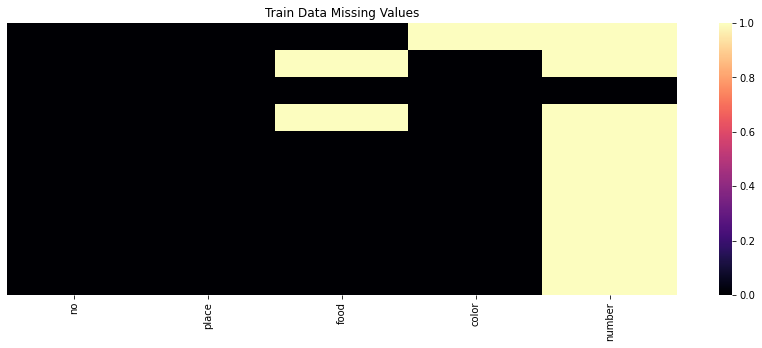

In [19]:
def missing_check(df) : 
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_title('Train Data Missing Values')
    plt.xticks(rotation=90)
    sns.heatmap(df.isnull(), yticklabels=False, cmap='magma', ax=ax)
    plt.show()
missing_check(data)

Info : 3 out of 5 columns have mising values
Info : 0 columns have more that 90% missing values
Info : 1 columns have more that 80% missing values
Info : 1 columns have more that 70% missing values


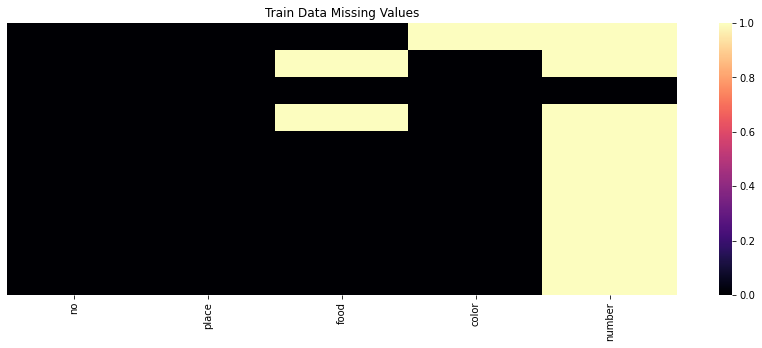

,column_name,count_missing,percent_missing
4,number,9,0.9
2,food,2,0.2
3,color,1,0.1


In [21]:
def missing_check(df) : 
    total = df.isnull().sum()    
    missing_df = pd.DataFrame({'count_missing': total}).reset_index().rename(columns={'index':'column_name'})
    missing_df['percent_missing'] = missing_df['count_missing']/len(df)
    missing_df = missing_df.sort_values(by='count_missing', ascending=False)
    missing_df = missing_df[missing_df['count_missing']!=0]
    print('Info : {} out of {} columns have mising values'.format(len(missing_df), len(df.columns)))
    missing_90 = missing_df[missing_df['percent_missing']>0.9]
    missing_80 = missing_df[missing_df['percent_missing']>0.8]
    missing_70 = missing_df[missing_df['percent_missing']>0.7]
    print("Info : {} columns have more that 90% missing values".format(len(missing_90)))
    print("Info : {} columns have more that 80% missing values".format(len(missing_80)))
    print("Info : {} columns have more that 70% missing values".format(len(missing_70)))   
    
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_title('Train Data Missing Values')
    plt.xticks(rotation=90)
    sns.heatmap(df.isnull(), yticklabels=False, cmap='magma', ax=ax)
    plt.show()
    return missing_df

missing_check(data)